In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


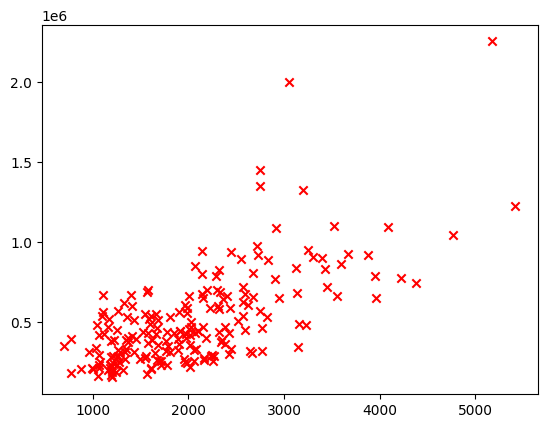

In [3]:
x = df['sqft_living'].values[0:200].reshape(-1,1)
y = df['price'].values[0:200].reshape(-1,1)
plt.scatter(x,y,color='red',marker='x')

Shape of Training Set (input) is: (120, 1)
Shape of Training Set (output) is: (120, 1)
Shape of Cross Validation Set (input) is: (40, 1)
Shape of Cross Validation Set (output) is: (40, 1)
Shape of Test Set (input) is: (40, 1)
Shape of Test Set (output) is: (40, 1)


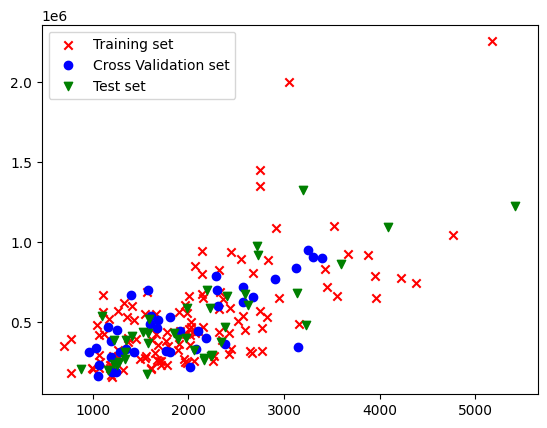

In [4]:
x_train,x_,y_train,y_ = train_test_split(x,y,test_size = 0.40,random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size = 0.50,random_state=1)
del x_,y_

print(f"Shape of Training Set (input) is: {x_train.shape}")
print(f"Shape of Training Set (output) is: {y_train.shape}")
print(f"Shape of Cross Validation Set (input) is: {x_cv.shape}")
print(f"Shape of Cross Validation Set (output) is: {y_cv.shape}")
print(f"Shape of Test Set (input) is: {x_test.shape}")
print(f"Shape of Test Set (output) is: {y_test.shape}")

plt.scatter(x_train,y_train,color='red',marker='x',label='Training set')
plt.scatter(x_cv,y_cv,color='blue',marker='o',label='Cross Validation set')
plt.scatter(x_test,y_test,color='green',marker='v',label='Test set')
plt.legend()
plt.show()

In [5]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_cv_scaled = scalar.transform(x_cv)
x_test_scaled = scalar.transform(x_test)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

# Predictions
y_train_pred = lin_reg.predict(x_train_scaled)
y_cv_pred = lin_reg.predict(x_cv_scaled)
y_test_pred = lin_reg.predict(x_test_scaled)

In [7]:
train_mse = mean_squared_error(y_train,y_train_pred)
cv_mse = mean_squared_error(y_cv,y_cv_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

print(f"Training MSE is: {train_mse:.2f}")
print(f"Cross Validation MSE is: {cv_mse:.2f}")
print(f"Test MSE is: {test_mse:.2f}")

Training MSE is: 62176413359.93
Cross Validation MSE is: 21645701951.52
Test MSE is: 29798185885.54


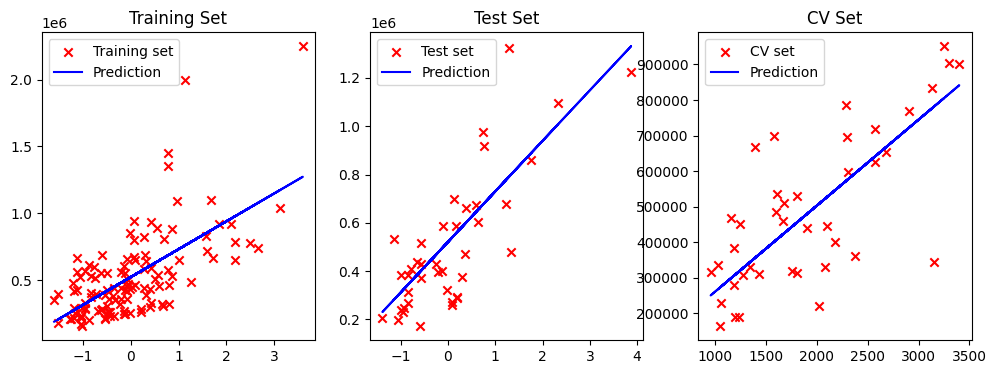

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(x_train_scaled,y_train,color='red',marker='x',label='Training set')
plt.plot(x_train_scaled,y_train_pred,color='blue',label='Prediction')
plt.title('Training Set')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(x_test_scaled,y_test,color='red',marker='x',label='Test set')
plt.plot(x_test_scaled,y_test_pred,color='blue',label='Prediction')
plt.title('Test Set')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(x_cv,y_cv,color='red',marker='x',label='CV set')
plt.plot(x_cv,y_cv_pred,color='blue',label='Prediction')
plt.title('CV Set')
plt.legend()

In [21]:
# PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly,y_train)


y_train_pred_poly = poly_reg.predict(x_train_poly)
y_cv_pred_poly = poly_reg.predict(x_cv_poly)
y_test_pred_poly = poly_reg.predict(x_test_poly)

train_mse_poly = mean_squared_error(y_train,y_train_pred_poly)
cv_mse_poly = mean_squared_error(y_cv,y_cv_pred_poly)
test_mse_poly = mean_squared_error(y_test,y_test_pred_poly)

print(f"Shape of Training Set (input) is: {x_train_poly.shape}")
print(f"Shape of Training Set (output) is: {y_train.shape}")
print(f"Shape of Cross Validation Set (input) is: {x_cv_poly.shape}")
print(f"Shape of Cross Validation Set (output) is: {y_cv.shape}")
print(f"Shape of Test Set (input) is: {x_test_poly.shape}")
print(f"Shape of Test Set (output) is: {y_test.shape}")

print(f"Training MSE(polynomial) is: {train_mse_poly:.2f}")
print(f"Cross Validation MSE(polynomial) is: {cv_mse_poly:.2f}")
print(f"Test MSE(polynomial) is: {test_mse_poly:.2f}")

Shape of Training Set (input) is: (120, 3)
Shape of Training Set (output) is: (120, 1)
Shape of Cross Validation Set (input) is: (40, 3)
Shape of Cross Validation Set (output) is: (40, 1)
Shape of Test Set (input) is: (40, 3)
Shape of Test Set (output) is: (40, 1)
Training MSE(polynomial) is: 60198015281.83
Cross Validation MSE(polynomial) is: 21280195615.59
Test MSE(polynomial) is: 32928525449.51


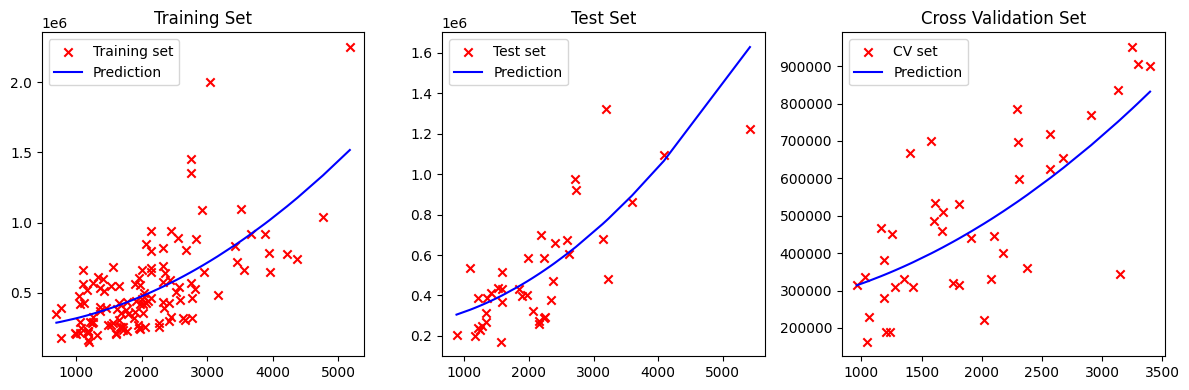

In [23]:
plt.figure(figsize=(12, 4))

# Training Set
plt.subplot(1, 3, 1)
sorted_idx = np.argsort(x_train.flatten())
plt.scatter(x_train, y_train, color='red', marker='x', label='Training set')
plt.plot(x_train[sorted_idx], y_train_pred_poly[sorted_idx], color='blue', label='Prediction')
plt.title('Training Set')
plt.legend()

# Test Set
plt.subplot(1, 3, 2)
sorted_idx = np.argsort(x_test.flatten())
plt.scatter(x_test, y_test, color='red', marker='x', label='Test set')
plt.plot(x_test[sorted_idx], y_test_pred_poly[sorted_idx], color='blue', label='Prediction')
plt.title('Test Set')
plt.legend()

# Cross Validation Set
plt.subplot(1, 3, 3)
sorted_idx = np.argsort(x_cv.flatten())
plt.scatter(x_cv, y_cv, color='red', marker='x', label='CV set')
plt.plot(x_cv[sorted_idx], y_cv_pred_poly[sorted_idx], color='blue', label='Prediction')
plt.title('Cross Validation Set')
plt.legend()

plt.tight_layout()
plt.show()
